In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
od.download('https://www.kaggle.com/datasets/nvnikhil0001/sis-fall-original-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: rayxbenze
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nvnikhil0001/sis-fall-original-dataset


100%|██████████| 227M/227M [00:01<00:00, 153MB/s]


In [4]:
path = '/content/sis-fall-original-dataset/SisFall_dataset'
member_list = os.listdir(path)

In [5]:
member_list.sort()

In [6]:
member_list

['Readme.txt',
 'SA01',
 'SA02',
 'SA03',
 'SA04',
 'SA05',
 'SA06',
 'SA07',
 'SA08',
 'SA09',
 'SA10',
 'SA11',
 'SA12',
 'SA13',
 'SA14',
 'SA15',
 'SA16',
 'SA17',
 'SA18',
 'SA19',
 'SA20',
 'SA21',
 'SA22',
 'SA23',
 'SE01',
 'SE02',
 'SE03',
 'SE04',
 'SE05',
 'SE06',
 'SE07',
 'SE08',
 'SE09',
 'SE10',
 'SE11',
 'SE12',
 'SE13',
 'SE14',
 'SE15',
 'Supplementary.pdf']

In [7]:
len(member_list)

40

In [8]:
member_list = member_list[1:39]

In [9]:
member_list

['SA01',
 'SA02',
 'SA03',
 'SA04',
 'SA05',
 'SA06',
 'SA07',
 'SA08',
 'SA09',
 'SA10',
 'SA11',
 'SA12',
 'SA13',
 'SA14',
 'SA15',
 'SA16',
 'SA17',
 'SA18',
 'SA19',
 'SA20',
 'SA21',
 'SA22',
 'SA23',
 'SE01',
 'SE02',
 'SE03',
 'SE04',
 'SE05',
 'SE06',
 'SE07',
 'SE08',
 'SE09',
 'SE10',
 'SE11',
 'SE12',
 'SE13',
 'SE14',
 'SE15']

In [10]:
for img_path in os.listdir('/content/sis-fall-original-dataset/SisFall_dataset/SA04/images/images'):
  os.remove('/content/sis-fall-original-dataset/SisFall_dataset/SA04/images/images' + '/' + img_path)

In [11]:
os.rmdir('/content/sis-fall-original-dataset/SisFall_dataset/SA04/images/images')

In [12]:
for member in member_list:
  for file in os.listdir(path+'/'+member):
    item_path = os.path.join(path, member, file)
    if not file.endswith('.txt'):
      if file == 'desktop.ini':
        os.remove(item_path)
      elif os.path.isdir(item_path):
        os.rmdir(item_path)
      else:
        os.remove(item_path)

In [13]:
error_count = 0
for member in member_list:
  for file in os.listdir(path+'/'+member):
    if not len(file) == 16:
      error_count += 1

print(error_count)

0


# ADL - Activities of Daily Living

D01 - Walking slowly  
D02 - Walking quickly  
D03 - Jogging slowly
D04 - Jogging quickly   
D05 - Walking upstairs and downstairs slowly      
D06 - Walking upstairs and downstairs quickly     
D07 - Slowly sit in a half height chair, wait a moment, and up slowly  
D08 - Quickly sit in a half height chair, wait a moment, and up quickly    
D09 - Slowly sit in a low height chair, wait a moment, and up slowly   
D10 - Quickly sit in a low height chair, wait a moment, and up quickly  
D11 - Sitting a moment, trying to get up, and collapse into a chair  
D12 - Sitting a moment, lying slowly, wait a moment, and sit again   
D13 - Sitting a moment, lying quickly, wait a moment, and sit again    
D14 - Being on ones back change to lateral position, wait a moment, and change to ones back     
D15 - Standing, slowly bending at knees, and getting up  
D16 - Standing, slowly bending without bending knees, and getting up             
D17 - Standing, get into a car, remain seated and get out of the car  
D18 - Stumble while walking        
D19 - Gently jump without falling (trying to reach a high object)    

F01 - Fall forward while walking caused by a slip         
F02 - Fall backward while walking caused by a slip          
F03 - Lateral fall while walking caused by a slip          
F04 - Fall forward while walking caused by a trip          
F05 - Fall forward while jogging caused by a trip           
F06 - Vertical fall while walking caused by fainting          
F07 - Fall while walking, with use of hands in a table to dampen fall, caused by fainting    
F08 - Fall forward when trying to get up                 
F09 - Lateral fall when trying to get up                    
F10 - Fall forward when trying to sit down                     
F11 - Fall backward when trying to sit down             
F12 - Lateral fall when trying to sit down             
F13 - Fall forward while sitting, caused by fainting or falling asleep            
F14 - Fall backward while sitting, caused by fainting or falling asleep   
F15 -  Lateral fall while sitting, caused by fainting or falling asleep      

In [14]:
data = []

In [15]:
for member in member_list:
  files = os.listdir(path+'/'+member)
  for file in sorted(files):
    item_path = os.path.join(path, member, file)
    print(file)
    with open(item_path, 'r') as f:
      data_lines =  f.read()
      data_lines = data_lines.replace(' ', '')
      data_lines = data_lines.split(';\n')

      for i in range(len(data_lines) - 1):
        if data_lines[i] == '':
          data_lines.pop(i)

        data_lines[i] = [int(x) for x in data_lines[i].split(',')]
        data_lines[i].append(file[0:3])
        data_lines[i].append(file[4:6])
        data_lines[i].append(file[6:8])
        data_lines[i].append(file[9:12])

        data.append(data_lines[i])




D01_SA01_R01.txt
D02_SA01_R01.txt
D03_SA01_R01.txt
D04_SA01_R01.txt
D05_SA01_R01.txt
D05_SA01_R02.txt
D05_SA01_R03.txt
D05_SA01_R04.txt
D05_SA01_R05.txt
D06_SA01_R01.txt
D06_SA01_R02.txt
D06_SA01_R03.txt
D06_SA01_R04.txt
D06_SA01_R05.txt
D07_SA01_R01.txt
D07_SA01_R02.txt
D07_SA01_R03.txt
D07_SA01_R04.txt
D07_SA01_R05.txt
D08_SA01_R01.txt
D08_SA01_R02.txt
D08_SA01_R03.txt
D08_SA01_R04.txt
D08_SA01_R05.txt
D09_SA01_R01.txt
D09_SA01_R02.txt
D09_SA01_R03.txt
D09_SA01_R04.txt
D09_SA01_R05.txt
D10_SA01_R01.txt
D10_SA01_R02.txt
D10_SA01_R03.txt
D10_SA01_R04.txt
D10_SA01_R05.txt
D11_SA01_R01.txt
D11_SA01_R02.txt
D11_SA01_R03.txt
D11_SA01_R04.txt
D11_SA01_R05.txt
D12_SA01_R01.txt
D12_SA01_R02.txt
D12_SA01_R03.txt
D12_SA01_R04.txt
D12_SA01_R05.txt
D13_SA01_R01.txt
D13_SA01_R02.txt
D13_SA01_R03.txt
D13_SA01_R04.txt
D13_SA01_R05.txt
D14_SA01_R01.txt
D14_SA01_R02.txt
D14_SA01_R03.txt
D14_SA01_R04.txt
D14_SA01_R05.txt
D15_SA01_R01.txt
D15_SA01_R02.txt
D15_SA01_R03.txt
D15_SA01_R04.txt
D15_SA01_R05.t

In [16]:
len(data)

15858929

In [17]:
data[0]

[17, -179, -99, -18, -504, -352, 76, -697, -279, 'D01', 'SA', '01', 'R01']

In [18]:
df = pd.DataFrame(data, columns= ['acc1_x', 'acc1_y', 'acc1_z', 'rot_x', 'rot_y', 'rot_z', 'acc2_x', 'acc2_y', 'acc2_z', 'adl', 'people_category', 'person', 'trial' ])

In [19]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,adl,people_category,person,trial
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA,01,R01
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA,01,R01
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA,01,R01
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA,01,R01
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA,01,R01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-14,-213,-143,-5,64,-8,-32,-809,-633,D17,SE,15,R05
15858925,-13,-210,-145,-7,65,-6,-32,-811,-631,D17,SE,15,R05
15858926,-13,-216,-143,-9,67,-4,-31,-813,-634,D17,SE,15,R05
15858927,-14,-213,-141,-9,71,-3,-31,-816,-632,D17,SE,15,R05


In [20]:
acc1_range = 16
acc1_res = 13

rot_range = 2000
rot_res = 16

acc2_range = 8
acc2_res = 14

In [21]:
acc1_factor = acc1_range * 2/ 2 ** acc1_res
rot_factor = rot_range * 2/ 2 ** rot_res
acc2_factor = acc2_range * 2/ 2 ** acc2_res

In [22]:
df['acc1_x'] = df['acc1_x'] * acc1_factor
df['acc1_y'] = df['acc1_y'] * acc1_factor
df['acc1_z'] = df['acc1_z'] * acc1_factor

df['rot_x'] = df['rot_x'] * rot_factor
df['rot_y'] = df['rot_y'] * rot_factor
df['rot_z'] = df['rot_z'] * rot_factor

df['acc2_x'] = df['acc2_x'] * acc2_factor
df['acc2_y'] = df['acc2_y'] * acc2_factor
df['acc2_z'] = df['acc2_z'] * acc2_factor

In [23]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,adl,people_category,person,trial
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,D01,SA,01,R01
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,D01,SA,01,R01
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,D01,SA,01,R01
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,D01,SA,01,R01
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,D01,SA,01,R01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-0.054688,-0.832031,-0.558594,-0.305176,3.906250,-0.488281,-0.031250,-0.790039,-0.618164,D17,SE,15,R05
15858925,-0.050781,-0.820312,-0.566406,-0.427246,3.967285,-0.366211,-0.031250,-0.791992,-0.616211,D17,SE,15,R05
15858926,-0.050781,-0.843750,-0.558594,-0.549316,4.089355,-0.244141,-0.030273,-0.793945,-0.619141,D17,SE,15,R05
15858927,-0.054688,-0.832031,-0.550781,-0.549316,4.333496,-0.183105,-0.030273,-0.796875,-0.617188,D17,SE,15,R05


<Axes: ylabel='adl'>

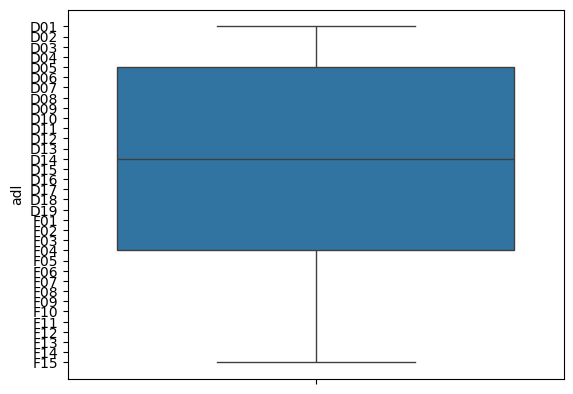

In [25]:
sns.boxplot(df['adl'])

<Axes: xlabel='adl', ylabel='Count'>

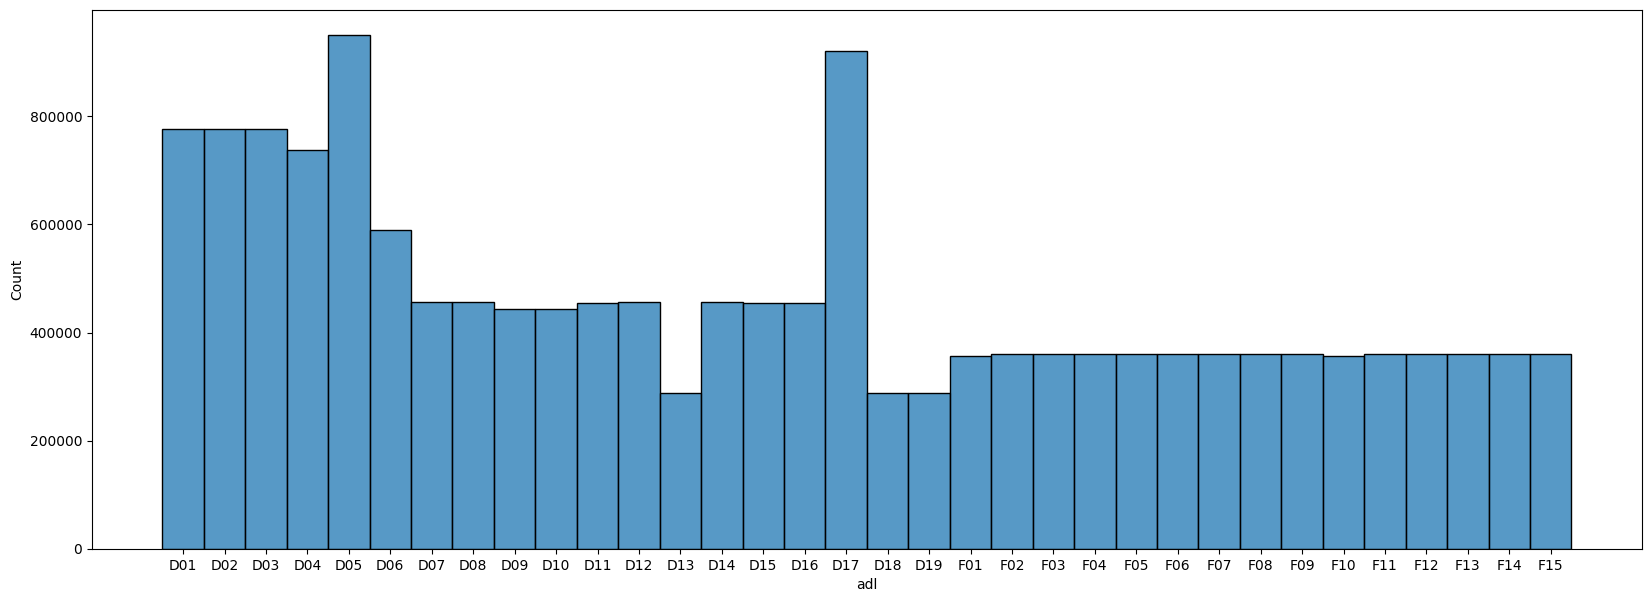

In [27]:
plt.figure(figsize=(20, 7))
sns.histplot(df['adl'])

In [28]:
def info(dataframe):
  print(100 * "_")
  print('DIMENSION: ({}, {})'.format(dataframe.shape[0], dataframe.shape[1]))
  print(100 * "_")
  print("COLUMNS:\n")
  print(dataframe.columns.values)
  print(100 * "_")
  print("DATA INFO:\n")
  print(dataframe.dtypes)
  print(100 * "_")
  print("MISSING VALUES:\n")
  print(dataframe.isnull().sum())
  print(100 * "_")
  print("NUMBER OF UNIQUE VALUES:\n")
  print(dataframe.nunique())
  print(100 * "_")
  print("UNIQUE VALUES:\n")
  columns = [column for column in dataframe.columns if dataframe[column].nunique() <= 10]
  for col in columns:
    print(f"{col}: {dataframe[col].unique()}")
  print(100 * "_")
  print("OCURRENCES:\n")
  columns = [column for column in dataframe.columns if dataframe[column].nunique() <= 10]
  for col in columns:
    print(f"{dataframe[col].value_counts()}")

In [29]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (15858929, 13)
____________________________________________________________________________________________________
COLUMNS:

['acc1_x' 'acc1_y' 'acc1_z' 'rot_x' 'rot_y' 'rot_z' 'acc2_x' 'acc2_y'
 'acc2_z' 'adl' 'people_category' 'person' 'trial']
____________________________________________________________________________________________________
DATA INFO:

acc1_x             float64
acc1_y             float64
acc1_z             float64
rot_x              float64
rot_y              float64
rot_z              float64
acc2_x             float64
acc2_y             float64
acc2_z             float64
adl                 object
people_category     object
person              object
trial               object
dtype: object
____________________________________________________________________________________________________
MISSING VALUES:

acc1_x             0
acc1_y             0
ac

In [30]:
is_fall = []

In [31]:
for data in df['adl']:
  if data.startswith('F'):
    is_fall.append(1)
  else:
    is_fall.append(0)

In [32]:
df['is_fall'] = is_fall

In [33]:
df['people_category'].replace('SA', 'Not Elder', inplace=True)

<ipython-input-33-84c008526e46>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['people_category'].replace('SA', 'Not Elder', inplace=True)


In [34]:
df['people_category'].replace('SE', 'Elder', inplace=True)

<ipython-input-34-8d22ae111e25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['people_category'].replace('SE', 'Elder', inplace=True)


In [35]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,adl,people_category,person,trial,is_fall
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,D01,Not Elder,01,R01,0
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,D01,Not Elder,01,R01,0
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,D01,Not Elder,01,R01,0
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,D01,Not Elder,01,R01,0
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,D01,Not Elder,01,R01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-0.054688,-0.832031,-0.558594,-0.305176,3.906250,-0.488281,-0.031250,-0.790039,-0.618164,D17,Elder,15,R05,0
15858925,-0.050781,-0.820312,-0.566406,-0.427246,3.967285,-0.366211,-0.031250,-0.791992,-0.616211,D17,Elder,15,R05,0
15858926,-0.050781,-0.843750,-0.558594,-0.549316,4.089355,-0.244141,-0.030273,-0.793945,-0.619141,D17,Elder,15,R05,0
15858927,-0.054688,-0.832031,-0.550781,-0.549316,4.333496,-0.183105,-0.030273,-0.796875,-0.617188,D17,Elder,15,R05,0


In [ ]:
df['is_fall'].value_counts()

,count
is_fall,
0,10465215
1,5393714


Subject: Age, Height, Weight, Gender

SA01: 26, 165, 53, F

SA02: 23, 176, 58.5, M

SA03: 19, 156, 48, F

SA04: 23, 170, 72 , M

SA05: 22, 172, 69.5, M

SA06: 21, 169, 58, M

SA07: 21, 156, 63, F

SA08: 21, 149, 41.5, F

SA09: 24, 165, 64, M

SA10; 21, 177, 67, M

SA11: 19, 170, 80.5, M

SA12: 25, 153, 47, F

SA13: 22, 157, 55, F

SA14: 27, 60, 46, F

SA15: 25, 160, 52, F

SA16: 20, 169, 61, F

SA17: 23, 182, 75, M

SA18: 23, 181, 73, M

SA19: 30, 170, 76, M

SA20: 30, 150, 42, F

SA21: 30, 183, 68, M

SA22: 19, 158, 50.5, F

SA23: 24, 156, 48, F

SE01: 71, 171, 102, M

SE02: 75, 150, 57, F

SE03: 62, 150, 51, F

SE04: 63, 160, 59, F

SE05: 63, 165, 72, M

SE06: 60, 163, 79, M

SE07: 65, 168, 76, M

SE08: 68, 163, 72, F

SE09: 66, 167, 65, M

SE10: 64, 156, 66 , F

SE11: 66, 169, 63, F

SE12: 69, 164, 56.5, M

SE13: 65, 171, 72.5, M

SE14: 67, 163, 58, M

SE15: 64, 150, 50, F

In [53]:
SA01 = (26, 165, 53, 'F')
SA02 = (23, 176, 58.5, 'M')
SA03 = (19, 156, 48, 'F')
SA04 = (23, 170, 72 , 'M')
SA05 = (22, 172, 69.5, 'M')
SA06 = (21, 169, 58, 'M')
SA07 = (21, 156, 63, 'F')
SA08 = (21, 149, 41.5, 'F')
SA09 = (24, 165, 64, 'M')
SA10 = (21, 177, 67, 'M')
SA11 = (19, 170, 80.5, 'M')
SA12 = (25, 153, 47, 'F')
SA13 = (22, 157, 55, 'F')
SA14 = (27, 60, 46, 'F')
SA15 = (25, 160, 52, 'F')
SA16 = (20, 169, 61, 'F')
SA17 = (23, 182, 75, 'M')
SA18 = (23, 181, 73, 'M')
SA19 = (30, 170, 76, 'M')
SA20 = (30, 150, 42, 'F')
SA21 = (30, 183, 68, 'M')
SA22 = (19, 158, 50.5, 'F')
SA23 = (24, 156, 48, 'F')

SE01 = (71, 171, 102, 'M')
SE02 = (75, 150, 57, 'F')
SE03 = (62, 150, 51, 'F')
SE04 = (63, 160, 59, 'F')
SE05 = (63, 165, 72, 'M')
SE06 = (60, 163, 79, 'M')
SE07 = (65, 168, 76, 'M')
SE08 = (68, 163, 72, 'F')
SE09 = (66, 167, 65, 'M')
SE10 = (64, 156, 66 , 'F')
SE11 = (66, 169, 63, 'F')
SE12 = (69, 164, 56.5, 'M')
SE13 = (65, 171, 72.5, 'M')
SE14 = (67, 163, 58, 'M')
SE15 = (64, 150, 50, 'F')


In [54]:
age = []
height = []
weight = []
sex = []

In [55]:
def data_append(person):
  age.append(person[0])
  height.append(person[1])
  weight.append(person[2])
  sex.append(person[3])

In [56]:

not_elder_dict = {
    '01': SA01, '02': SA02, '03': SA03, '04': SA04, '05': SA05,
    '06': SA06, '07': SA07, '08': SA08, '09': SA09, '10': SA10,
    '11': SA11, '12': SA12, '13': SA13, '14': SA14, '15': SA15,
    '16': SA16, '17': SA17, '18': SA18, '19': SA19, '20': SA20,
    '21': SA21, '22': SA22, '23': SA23
}

elder_dict = {
    '01': SE01, '02': SE02, '03': SE03, '04': SE04, '05': SE05,
    '06': SE06, '07': SE07, '08': SE08, '09': SE09, '10': SE10,
    '11': SE11, '12': SE12, '13': SE13, '14': SE14, '15': SE15
}

for i in range(len(df)):
    data = df.loc[i]
    person_id = data['person']  # Extract person ID once
    if data['people_category'] == 'Not Elder':
        data_append(not_elder_dict.get(person_id, None))
    elif data['people_category'] == 'Elder':
        data_append(elder_dict.get(person_id, None))


In [57]:
df['age'], df['height'], df['weight'], df['sex'] = age, height, weight, sex

In [58]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,adl,people_category,person,trial,is_fall,age,height,weight,sex
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,D01,Not Elder,01,R01,0,26,165,53.0,F
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,D01,Not Elder,01,R01,0,26,165,53.0,F
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,D01,Not Elder,01,R01,0,26,165,53.0,F
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,D01,Not Elder,01,R01,0,26,165,53.0,F
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,D01,Not Elder,01,R01,0,26,165,53.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-0.054688,-0.832031,-0.558594,-0.305176,3.906250,-0.488281,-0.031250,-0.790039,-0.618164,D17,Elder,15,R05,0,64,150,50.0,F
15858925,-0.050781,-0.820312,-0.566406,-0.427246,3.967285,-0.366211,-0.031250,-0.791992,-0.616211,D17,Elder,15,R05,0,64,150,50.0,F
15858926,-0.050781,-0.843750,-0.558594,-0.549316,4.089355,-0.244141,-0.030273,-0.793945,-0.619141,D17,Elder,15,R05,0,64,150,50.0,F
15858927,-0.054688,-0.832031,-0.550781,-0.549316,4.333496,-0.183105,-0.030273,-0.796875,-0.617188,D17,Elder,15,R05,0,64,150,50.0,F


In [59]:
df['trial'].replace({'R01': 1, 'R02': 2, 'R03': 3, 'R04': 4, 'R05': 5, 'R06': 6}, inplace= True)

<ipython-input-59-f3487e94583c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trial'].replace({'R01': 1, 'R02': 2, 'R03': 3, 'R04': 4, 'R05': 5, 'R06': 6}, inplace= True)
<ipython-input-59-f3487e94583c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['trial'].replace({'R01': 1, 'R02': 2, 

In [61]:
df.drop(columns= ['person', 'adl'], axis= 1, inplace= True)

In [62]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,people_category,trial,is_fall,age,height,weight,sex
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,Not Elder,1,0,26,165,53.0,F
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,Not Elder,1,0,26,165,53.0,F
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,Not Elder,1,0,26,165,53.0,F
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,Not Elder,1,0,26,165,53.0,F
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,Not Elder,1,0,26,165,53.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-0.054688,-0.832031,-0.558594,-0.305176,3.906250,-0.488281,-0.031250,-0.790039,-0.618164,Elder,5,0,64,150,50.0,F
15858925,-0.050781,-0.820312,-0.566406,-0.427246,3.967285,-0.366211,-0.031250,-0.791992,-0.616211,Elder,5,0,64,150,50.0,F
15858926,-0.050781,-0.843750,-0.558594,-0.549316,4.089355,-0.244141,-0.030273,-0.793945,-0.619141,Elder,5,0,64,150,50.0,F
15858927,-0.054688,-0.832031,-0.550781,-0.549316,4.333496,-0.183105,-0.030273,-0.796875,-0.617188,Elder,5,0,64,150,50.0,F


In [63]:
col = df.pop('is_fall')
df['is_fall'] = col

In [64]:
df

,acc1_x,acc1_y,acc1_z,rot_x,rot_y,rot_z,acc2_x,acc2_y,acc2_z,people_category,trial,age,height,weight,sex,is_fall
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,Not Elder,1,26,165,53.0,F,0
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,Not Elder,1,26,165,53.0,F,0
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,Not Elder,1,26,165,53.0,F,0
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,Not Elder,1,26,165,53.0,F,0
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,Not Elder,1,26,165,53.0,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858924,-0.054688,-0.832031,-0.558594,-0.305176,3.906250,-0.488281,-0.031250,-0.790039,-0.618164,Elder,5,64,150,50.0,F,0
15858925,-0.050781,-0.820312,-0.566406,-0.427246,3.967285,-0.366211,-0.031250,-0.791992,-0.616211,Elder,5,64,150,50.0,F,0
15858926,-0.050781,-0.843750,-0.558594,-0.549316,4.089355,-0.244141,-0.030273,-0.793945,-0.619141,Elder,5,64,150,50.0,F,0
15858927,-0.054688,-0.832031,-0.550781,-0.549316,4.333496,-0.183105,-0.030273,-0.796875,-0.617188,Elder,5,64,150,50.0,F,0


In [66]:
df.to_csv('fall_final_dataset.csv', index= False)

In [ ]:
!pip install kaggle